# Investigating Traffic Violation Patterns in Montgomery County, MD
Flatiron Mod 3 Project by Manisha, Tim, and Jon

## Project Overview:

The purpose of this project was to investigate patterns in traffic violations issued in Montgomery County, MD from January 1, 2012 through June 4, 2019. In recent years, a growing number of police departments across the country have been making an effort to make their data on police-citizen interactions publicly available in an effort to help build trust, transparency and communication between police and community members. 

The full database, which is made available to the public through the [Montgomery County Government website](https://data.montgomerycountymd.gov/Public-Safety/Traffic-Violations/4mse-ku6q/data), had over 1.5 million records of traffic violations at the time we conducted our analysis. Each record in the database contains the following information: basic demographic information on the driver,  information about the driver's vehicle, a description of the reported offense, outcome of the interaction (e.g., whether a citation was issued), and the date, time, and location the violation occurred.  

## Central Questions Guiding Our Investigation:

1) Are Black and Hispanic drivers being issued citations at equal rates for failing to display a registration card?

2) Are White and Black drivers being issued citations at equal rates?

3) When comparing different racial groups (Black vs. White), is there a difference in the rate at which male vs. female drivers in each of these groups are being issued citations? 

4) Does having a light vs. dark colored affect the likelihood of getting in an accident?


## Hypothesis-Testing:

We conducted four hypothesis tests in order to investigate the above questions.  Each of the following statistical tests was conducted 100 times on samples randomly drawn from the full database in order to minimize the potential for sampling bias, and increase the likelihood our findings are representative of the general traffic violation patterns found in Montgomery County, MD.

#### H1) For drivers pulled over with a recorded offense of "failure to show registration card," there is no difference in the proportion of Hispanic vs. Black drivers who are given only a warning.

The results of our proportional t-test indicated that the proportion of Hispanic drivers who have been issued citations after being pulled over is significantly higher than the proportion of Black drivers. 

#### H2) For drivers pulled over, there is no difference in the proportion of White vs. Black drivers who are given a citation.

The results of our proportional t-test indicated that the proportion of Black drivers who have been issued citations after being pulled over is significantly higher than White drivers. 

#### H3) For drivers pulled over, there is no difference by race and gender in the proportional rate at which they are given a citation.

To test these hypotheses, we conduct four separate proportional t-tests, and found that Black males have been issued citations at a higher rate than Black females or White males.  Furthermore, while White males were found to have been issued citations more frequently than White females, there were no significant differences between the rate of citations for White females vs. Black females.
 
#### H4) The color of a car is not related to that car being in an accident.


### Limitations and Conclusions:

While our analyses suggest that there are some racial/ethnic and gender differences in the rate in which drivers have been issued citations for traffic violations in Montgomery County from 2012-2019, we need to be careful in attempting to derive meaning from these results.





# Import of Database

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from Workbook_Init import *

# Imports sqlite3, pandas, numpy, matplotlib, seaborn, statsmodels.api, scipy.stats.chisquare

In [3]:
# Connect to our SQLite database
conn = sqlite3.connect('traffic.db')
c = conn.cursor()

In [4]:
# Pull in the whole table as a dataframe
# Be patient, takes about 40 seconds

sql_all = "SELECT * FROM traffic"
all_df = pd.read_sql_query(sql_all, conn)
all_df.head()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
0,865defcf-8348-4e11-a5bf-996d8b3ead3c,06/03/2019,22:49:00,MCP,"2nd District, Bethesda",DRIVER CHANGING LANES WHEN UNSAFE,ROCKVILLE PIKE @ GROSVENOR LN,39.0231383333333,-77.102615,No,No,No,No,No,No,No,No,No,No,DC,02 - Automobile,2016,BMW,X3,SILVER,Warning,21-309(b),Transportation Article,false,BLACK,M,WASHINGTON,DC,DC,A - Marked Patrol,"(39.0231383333333, -77.102615)",1,1,12,111,1
1,20bff600-1843-46c4-9596-6b0670eb8d74,06/03/2019,22:48:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER/ROYAL DOMINION,38.99006,-77.15189,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015,MERCEDEZBENZ,4S,BLACK,Warning,21-801.1,Transportation Article,false,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.99006, -77.15189)",1,1,12,103,1
2,e121eebe-daa1-4cca-afd4-8abb4b388ed6,06/03/2019,22:45:00,MCP,"4th District, Wheaton",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,GEORGIA @ EPPING,39.0662666666667,-77.0592166666667,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015,HONDA,CIVIC,GRAY,Warning,21-801.1,Transportation Article,false,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0662666666667, -77.0592166666667)",4,4,23,6,1
3,1e25ee9b-c019-41c2-9d74-41e05e6d1cee,06/03/2019,22:43:00,MCP,"4th District, Wheaton",STOP LIGHTS (*),GEORGIA AVE / ASPON HILL RD,39.0825783333333,-77.076885,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2014,KIA,4S,SILVER,ESERO,64*,,false,WHITE,M,ROCKVILLE,MD,MD,A - Marked Patrol,"(39.0825783333333, -77.076885)",4,4,59,6,1
4,2c5730ec-d5e6-4657-a5a0-fcecca1ab140,06/03/2019,22:41:00,MCP,"2nd District, Bethesda",FAILURE TO DISPLAY & REFLECT RED COLOR LIGHT ON REAR LAMPS AND REFLECTORS AS REQ.,ARLINGTON RD / BETHESDA AVE,38.97886,-77.0985183333333,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008,ACUR,TL,GRAY,Warning,22-209(b),Transportation Article,false,WHITE,F,BETHESDA,MD,MD,A - Marked Patrol,"(38.97886, -77.0985183333333)",1,1,12,111,1


In [5]:
# Info on the data fields in the full table

all_df.describe()

,SeqID,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation,Council Districts,Councils,Communities,Zip Codes,Municipalities
count,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036,1529036
unique,867384,2710,1440,1,9,13987,210296,298798,339125,6,2,2,2,2,2,2,2,2,2,71,33,343,3900,19172,28,4,1078,5,2,6,3,7940,69,71,19,749951,6,6,63,145,25
top,33c49de3-9e36-4f36-9326-b59a95e86fe8,03/17/2015,23:30:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,WAYNE AVE @ DALE DR,0,0,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2007,TOYOTA,4S,BLACK,Warning,21-801.1,Transportation Article,false,WHITE,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(0.0, 0.0)",4,4,36,17,1
freq,59,1281,2312,1529036,375716,125683,2172,110485,110485,1482066,1480468,1511578,1499864,1528696,1484350,1528904,1522414,1526712,1528734,1333868,1347005,91465,175550,169430,311612,760397,191251,1439175,1492603,541783,1024170,380216,1379705,1329309,1267088,110485,334292,334292,184196,131235,1161876


In [6]:
# There appear to be many duplicates in the table.  There are multiple charges per SeqID.
np.mean(all_df.groupby('SeqID').size())

1.7628132407330548

## Create Unique Traffic Incidents Table and Aggregate Other Variables

In [7]:
# Create Table of Unique Traffic Incidents
# Toggle boolean to determine whether to reload

recreate_table = False

if recreate_table:
    sql_drop_table = """DROP TABLE IF EXISTS traffic_unique"""
    sql_create_unique_table = """
    CREATE TABLE traffic_unique AS
    SELECT SeqID, count(*) as Count, min(Race) as Race, min(Gender) as Gender, min(Color) as Color, min(Accident) as Accident, group_concat([Violation Type]) as 'Violation Type', group_concat([Description]) as Description FROM traffic
    GROUP BY SeqID;
    """

    c.execute(sql_drop_table)
    c.execute(sql_create_unique_table)

In [8]:
# Inspect the newly created table

sql_unique = """
                SELECT * from traffic_unique
                """

unique_df = pd.read_sql_query(sql_unique, conn)
unique_df.head()

,SeqID,Count,Race,Gender,Color,Accident,Violation Type,Description
0,00001e27-8bde-4328-8b33-2d2d9a9ce862,1,HISPANIC,F,N/A,No,Citation,PEDESTRIAN CROSSING ROADWAY BETWEEN ADJACENT INTERSECTIONS HAVING TRAFFIC CONTROL SIGNAL
1,00006268-72eb-42ff-b6b0-50c21d820e9c,1,BLACK,M,BLUE,No,Warning,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHEN REQUIRED
2,000071c5-c385-4191-9cd7-e854d2054963,1,BLACK,F,BLACK,No,Warning,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS
3,000099b1-4dcb-4f94-8aef-71ffb198890b,2,WHITE,M,BLACK,No,"Warning,Citation","DRIVING VEHICLE IN EXCESS OF REASONABLE AND PRUDENT SPEED ON HIGHWAY SPEED,FAILURE TO CONTROL VE..."
4,0000b339-ca9d-4a52-90a6-90ebd3110cd2,1,HISPANIC,M,BLACK,No,Warning,"FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAMPS, ILLUMINATING DEVICE IN UNFAVORABLE VISIBILITY ..."


In [9]:
violtype_df = unique_df.copy()
violtype_df['Warning'] = violtype_df['Violation Type'].str.contains('Warning')
violtype_df['Citation'] = violtype_df['Violation Type'].str.contains('Citation')
violtype_df['Warning_Only'] = violtype_df.Warning  & (violtype_df.Citation==False)
violtype_df.head()

,SeqID,Count,Race,Gender,Color,Accident,Violation Type,Description,Warning,Citation,Warning_Only
0,00001e27-8bde-4328-8b33-2d2d9a9ce862,1,HISPANIC,F,N/A,No,Citation,PEDESTRIAN CROSSING ROADWAY BETWEEN ADJACENT INTERSECTIONS HAVING TRAFFIC CONTROL SIGNAL,False,True,False
1,00006268-72eb-42ff-b6b0-50c21d820e9c,1,BLACK,M,BLUE,No,Warning,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHEN REQUIRED,True,False,True
2,000071c5-c385-4191-9cd7-e854d2054963,1,BLACK,F,BLACK,No,Warning,DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,True,False,True
3,000099b1-4dcb-4f94-8aef-71ffb198890b,2,WHITE,M,BLACK,No,"Warning,Citation","DRIVING VEHICLE IN EXCESS OF REASONABLE AND PRUDENT SPEED ON HIGHWAY SPEED,FAILURE TO CONTROL VE...",True,True,False
4,0000b339-ca9d-4a52-90a6-90ebd3110cd2,1,HISPANIC,M,BLACK,No,Warning,"FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAMPS, ILLUMINATING DEVICE IN UNFAVORABLE VISIBILITY ...",True,False,True


In [10]:
pd.crosstab(violtype_df['Race'], violtype_df['Warning_Only']).apply(lambda r: r/r.sum(), axis=1)

Warning_Only,False,True
Race,,
ASIAN,0.434478,0.565522
BLACK,0.445983,0.554017
HISPANIC,0.494629,0.505371
NATIVE AMERICAN,0.428122,0.571878
OTHER,0.429363,0.570637
WHITE,0.442501,0.557499


In [11]:
pd.crosstab(violtype_df['Race'], violtype_df['Citation']).apply(lambda r: r/r.sum(), axis=1)

Citation,False,True
Race,,
ASIAN,0.610069,0.389931
BLACK,0.595512,0.404488
HISPANIC,0.554967,0.445033
NATIVE AMERICAN,0.634313,0.365687
OTHER,0.605486,0.394514
WHITE,0.590060,0.409940


# Hypothesis Testing

## Null Hypothesis 1: 
H0: For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning.


/Users/Mango/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


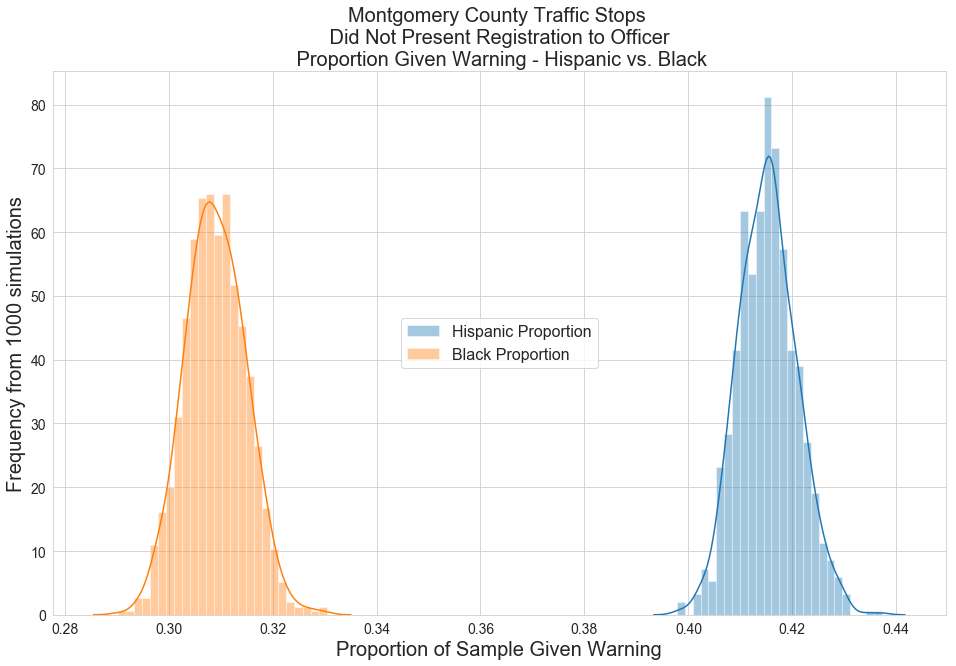

In [12]:
# 2 prop z-test on white versus black warnings

from statsmodels.stats.proportion import proportions_ztest


n_sim = 1000

mu_hispanic_list = []
mu_black_list = []
h1_z_list = []
h1_p_list = []

for i in range(n_sim):
    n_sample = 5000

    
    descrip = "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER"
    
    df_hispanic = sample_from_traffic_3(n_sample, conn, filters={'race':'HISPANIC', 'Description':descrip}, show_SQL=False)
    df_black = sample_from_traffic_3(n_sample, conn, filters={'race':'BLACK', 'Description':descrip}, show_SQL=False)

    hispanic_cited = sum((df_hispanic['Violation Type'].str.contains('Warning')) & (df_hispanic['Violation Type'].str.contains('Citation')==False))
    black_cited = sum((df_black['Violation Type'].str.contains('Warning')) & (df_hispanic['Violation Type'].str.contains('Citation')==False))

    mu_hispanic_list.append(hispanic_cited / n_sample)
    mu_black_list.append(black_cited / n_sample)
    
    count = np.array([hispanic_cited, black_cited])
    nobs = np.array([n_sample, n_sample])
    z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    h1_z_list.append(z)
    h1_p_list.append(p)
    


fig = plt.figure(figsize=(16,10))


sns.distplot(mu_hispanic_list, label="Hispanic Proportion")
sns.distplot(mu_black_list, label="Black Proportion")
plt.title('Montgomery County Traffic Stops \n Did Not Present Registration to Officer \n Proportion Given Warning - Hispanic vs. Black', fontsize=20)



plt.xlabel('Proportion of Sample Given Warning', fontsize=20)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=20)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16, loc=10);


In [13]:
null_hyp_1 = """For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning."""

print_test_results(h1_p_list, null_hyp_1)

H0: For drivers pulled over where the Description of offense is "FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER", there is no difference in the proportion of hispanic and black drivers who are given only a warning.

Out of 1000 repeated tests, the null hypothesis was rejected 1000 times (100.0%) at an alpha level of 0.05.


## Null Hypothesis 2: 
H0: For drivers pulled over, there is no difference in the proportion of white and black drivers who are given a citation.

/Users/Mango/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


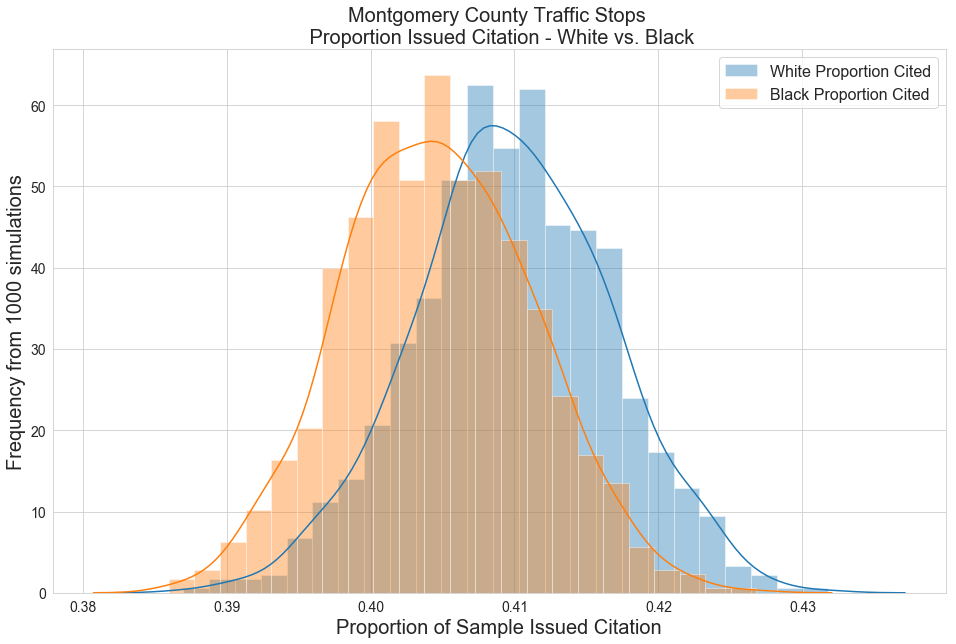

In [14]:
# 2 prop z-test on white versus black citations

from statsmodels.stats.proportion import proportions_ztest


n_sim = 1000

mu_white_list = []
mu_black_list = []
h2_z_list = []
h2_p_list = []

for i in range(n_sim):
    n_sample = 5000

    df_white = sample_from_traffic_3(n_sample, conn, filters={'Race':'WHITE'}, show_SQL=False)
    df_black = sample_from_traffic_3(n_sample, conn, filters={'Race':'BLACK'}, show_SQL=False)

    white_cited = sum(df_white['Violation Type'].str.contains('Citation'))
    black_cited = sum(df_black['Violation Type'].str.contains('Citation'))

    mu_white_list.append(white_cited / n_sample)
    mu_black_list.append(black_cited / n_sample)
    
    count = np.array([white_cited, black_cited])
    nobs = np.array([n_sample, n_sample])
    z,p = proportions_ztest(count, nobs, value=0, alternative='two-sided')
    h2_z_list.append(z)
    h2_p_list.append(p)
    


fig = plt.figure(figsize=(16,10))


sns.distplot(mu_white_list, label="White Proportion Cited")
sns.distplot(mu_black_list, label="Black Proportion Cited")
plt.title('Montgomery County Traffic Stops \n Proportion Issued Citation - White vs. Black', fontsize=20)

plt.xlabel('Proportion of Sample Issued Citation', fontsize=20)
plt.ylabel('Frequency from {} simulations'.format(n_sim), fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=16);


In [15]:
null_hyp_2 = """For drivers pulled over, there is no difference in the proportion of white and black drivers who are given a citation."""

print_test_results(h2_p_list, null_hyp_2)


H0: For drivers pulled over, there is no difference in the proportion of white and black drivers who are given a citation.

Out of 1000 repeated tests, the null hypothesis was rejected 70 times (7.0%) at an alpha level of 0.05.


## Null Hypothesis 3: 
For drivers pulled over, there is no difference in the proportion of white and black drivers and male and female drivers who are given a citation.


In [16]:
# 2 prop z-test on white versus black warnings
# we are running a z-test instead of a t-test because we're looking at the proportions of sample 
#given a warning rather than the number of people

from statsmodels.stats.proportion import proportions_ztest

#n_sim is repeating the whole sampling process of 5000 people for each category, 100 times
n_sim = 1000


mu_black_male_list = []
mu_black_female_list = []
mu_white_male_list = []
mu_white_female_list = []

z3_list = []
p3_list = []

for i in range(n_sim):
    n_sample = 5000

    df_black_male = sample_from_traffic_3(n_sample, conn, filters={'race':'BLACK','gender':'M'}, show_SQL=False)
    df_black_female = sample_from_traffic_3(n_sample, conn, filters={'race':'BLACK', 'gender':'F'}, show_SQL=False)
    df_white_male = sample_from_traffic_3(n_sample, conn, filters={'race':'WHITE', 'gender':'M'}, show_SQL=False)
    df_white_female = sample_from_traffic_3(n_sample, conn, filters={'race':'WHITE', 'gender':'F'}, show_SQL=False)


    black_male_cited = sum(df_black_male['Violation Type'].str.contains('Citation'))
    black_female_cited = sum(df_black_female['Violation Type'].str.contains('Citation'))
    white_male_cited = sum(df_white_male['Violation Type'].str.contains('Citation'))
    white_female_cited = sum(df_white_female['Violation Type'].str.contains('Citation'))

    mu_black_male_list.append(black_male_cited / n_sample)
    mu_black_female_list.append(black_female_cited / n_sample)
    mu_white_male_list.append(white_male_cited / n_sample)
    mu_white_female_list.append(white_female_cited / n_sample)
    
    nobs = np.array([n_sample, n_sample])
    
    z1,p1 = proportions_ztest(np.array([black_male_cited, black_female_cited]), nobs, value=0, alternative='two-sided')
    z2,p2 = proportions_ztest(np.array([black_male_cited, white_male_cited]), nobs, value=0, alternative='two-sided')
    z3,p3 = proportions_ztest(np.array([white_female_cited, black_female_cited]), nobs, value=0, alternative='two-sided')
    z4,p4 = proportions_ztest(np.array([white_male_cited, white_female_cited]), nobs, value=0, alternative='two-sided')

    z3_list.append([z1, z2, z3, z4])
    p3_list.append([p1, p2, p3, p4])
    



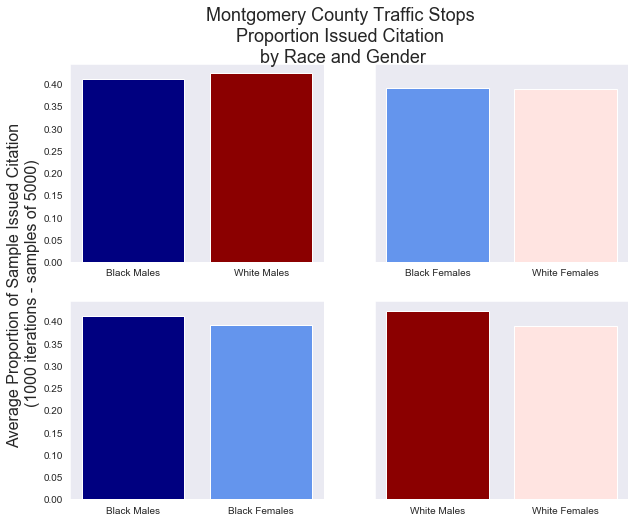

In [23]:
sns.set_style('dark')
fig, axes = plt.subplots(2, 2, sharey = True, figsize=(10, 8))


mu_black_male = np.mean(mu_black_male_list)
mu_white_male = np.mean(mu_white_male_list)
mu_white_female = np.mean(mu_white_female_list)
mu_black_female = np.mean(mu_black_female_list)

mean_list = [mu_black_male, mu_white_male, mu_black_female, mu_white_female]
names = ['Black Males', 'White Males', 'Black Females', 'White Females']
color_list = ['navy', 'darkred', 'cornflowerblue', 'mistyrose']

axes[0, 0].bar([names[0], names[1]], [mean_list[0], mean_list[1]], color=[color_list[0], color_list[1]])
axes[0, 1].bar([names[2], names[3]], [mean_list[2], mean_list[3]], color=[color_list[2], color_list[3]])
axes[1, 0].bar([names[0], names[2]], [mean_list[0], mean_list[2]], color=[color_list[0], color_list[2]])
axes[1, 1].bar([names[1], names[3]], [mean_list[1], mean_list[3]], color=[color_list[1], color_list[3]]);

fig.suptitle('Montgomery County Traffic Stops\n Proportion Issued Citation \n by Race and Gender\n', fontsize=18)

#plt.xlabel('Race and Gender', fontsize=16)
#plt.ylabel('Proportion of Sample Issued Citation\n (100 iterations - samples of 5000)', fontsize=14);

fig.text(0.06, 0.5, 'Average Proportion of Sample Issued Citation \n({} iterations - samples of {})'.format(n_sim, n_sample), ha='center', va='center', rotation='vertical', fontsize=16);

In [18]:
null_hyp_4a = """For drivers pulled over, there is no difference in the proportion of white male and black male drivers who are given a citation."""
null_hyp_4b = """For drivers pulled over, there is no difference in the proportion of white female and black female drivers who are given a citation."""

null_hyp_4c = """For drivers pulled over, there is no difference in the proportion of black male and black female drivers who are given a citation."""
null_hyp_4d = """For drivers pulled over, there is no difference in the proportion of white male and white female drivers who are given a citation."""

h4a_p_list = [x[0] for x in p3_list]
h4b_p_list = [x[1] for x in p3_list]
h4c_p_list = [x[2] for x in p3_list]
h4d_p_list = [x[3] for x in p3_list]


print_test_results(h4a_p_list, null_hyp_4a)
print('\n')
print_test_results(h4b_p_list, null_hyp_4b)
print('\n')
print_test_results(h4c_p_list, null_hyp_4c)
print('\n')
print_test_results(h4d_p_list, null_hyp_4d)

H0: For drivers pulled over, there is no difference in the proportion of white male and black male drivers who are given a citation.

Out of 1000 repeated tests, the null hypothesis was rejected 557 times (55.7%) at an alpha level of 0.05.


H0: For drivers pulled over, there is no difference in the proportion of white female and black female drivers who are given a citation.

Out of 1000 repeated tests, the null hypothesis was rejected 232 times (23.2%) at an alpha level of 0.05.


H0: For drivers pulled over, there is no difference in the proportion of black male and black female drivers who are given a citation.

Out of 1000 repeated tests, the null hypothesis was rejected 52 times (5.2%) at an alpha level of 0.05.


H0: For drivers pulled over, there is no difference in the proportion of white male and white female drivers who are given a citation.

Out of 1000 repeated tests, the null hypothesis was rejected 948 times (94.8%) at an alpha level of 0.05.


## Null Hypothesis 4: 
The color of car and whether the car was involved in an accident are independent variables.

In [19]:
df = unique_df

contingency_table = pd.crosstab(
    df['Color'],
    df['Accident'],
    margins = False
)
contingency_table[['Yes', 'No']]

Accident,Yes,No
Color,,
,4,1238
BEIGE,133,9150
BLACK,1785,171669
BLUE,788,62600
"BLUE, DARK",239,17622
"BLUE, LIGHT",169,11435
BRONZE,25,2179
BROWN,48,4097
CAMOUFLAGE,0,19


In [20]:
f_obs = np.array([contingency_table['No'].values,
                  contingency_table['Yes'].values])

chi2_contingency(f_obs)[0:3]

(436.78178561992945, 1.5374775548906678e-75, 27)